##Importing Libraries

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import matplotlib.category
from sklearn.neural_network import MLPRegressor

In [39]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Data Loading

In [40]:
path="/content/gdrive/My Drive/BE Air Quality Monitoring/Implementation/Holt Winter's/delhi.csv"
df=pd.read_csv(path) 
print(df)

          Date  ...                                           pregnant
0     31-10-19  ...  The current level of air quality is likely to ...
1     31-10-19  ...  The current level of air quality is likely to ...
2     31-10-19  ...  The current level of air quality is likely to ...
3     01-11-19  ...  The current level of air quality is likely to ...
4     01-11-19  ...  The current level of air quality is likely to ...
...        ...  ...                                                ...
2699  27-02-20  ...  The current level of air quality is likely to ...
2700  27-02-20  ...  The current level of air quality is likely to ...
2701  27-02-20  ...  The current level of air quality is likely to ...
2702  27-02-20  ...  The current level of air quality is likely to ...
2703  27-02-20  ...  The current level of air quality is likely to ...

[2704 rows x 25 columns]


In [0]:
mean=df['CO'].mean()
df['CO'].replace(np.nan,mean,inplace=True)

mean=df['SO2'].mean()
df['SO2'].replace(np.nan,mean,inplace=True)

mean=df['NO2'].mean()
df['NO2'].replace(np.nan,mean,inplace=True)

mean=df['O3'].mean()
df['O3'].replace(np.nan,mean,inplace=True)

mean=df['PM10'].mean()
df['PM10'].replace(np.nan,mean,inplace=True)

mean=df['PM25'].mean()
df['PM25'].replace(np.nan,mean,inplace=True)

In [0]:
plt.figure(figsize=(40,8))
plt.plot(df['Date'],df['NO2'],label='NO2')
plt.legend()

           AQI        CO       NO2        O3      PM10      PM25       SO2
AQI   1.000000  0.494765  0.195614  0.025660  0.698631  0.698500  0.075413
CO    0.494765  1.000000  0.193114 -0.386154  0.777883  0.703842  0.155004
NO2   0.195614  0.193114  1.000000  0.282135  0.268168  0.102463  0.115813
O3    0.025660 -0.386154  0.282135  1.000000 -0.139868 -0.203737  0.037804
PM10  0.698631  0.777883  0.268168 -0.139868  1.000000  0.934057  0.152062
PM25  0.698500  0.703842  0.102463 -0.203737  0.934057  1.000000  0.115142
SO2   0.075413  0.155004  0.115813  0.037804  0.152062  0.115142  1.000000


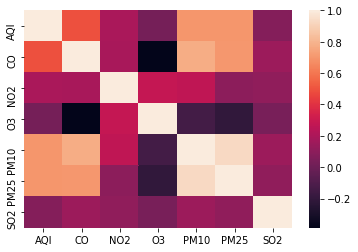

In [0]:
print(df.corr(method='pearson'))
ax=sns.heatmap(df.corr(method='pearson')) 

##Data Pre-processing

1. Merging date and time as single timestamp (datatype: datetime)

In [0]:
for ind in df.index:
	string=df['Date'][ind]
	string = string[:6]+"20"+string[6:]
	string = string[6:]+"-"+string[3:5]+"-"+string[0:2]
	dat=datetime.strptime(string,'%Y-%m-%d').date()
	time=datetime.strptime(df['Timestamp'][ind],'%H:%M:%S').time()
	timestamp = datetime.combine(dat,time)
	df['Date'][ind]=timestamp

print(df['Date'])
print()
type(df['Date'][0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       2019-10-31 21:00:00
1       2019-10-31 22:00:00
2       2019-10-31 23:00:00
3       2019-11-01 00:00:00
4       2019-11-01 01:00:00
               ...         
2699    2020-02-27 10:00:00
2700    2020-02-27 11:00:00
2701    2020-02-27 12:00:00
2702    2020-02-27 13:00:00
2703    2020-02-27 14:00:00
Name: Date, Length: 2704, dtype: object



datetime.datetime

2. Dealing with missing values

In [0]:
mean=df['CO'].mean()
df['CO'].replace(np.nan,mean,inplace=True)

mean=df['SO2'].mean()
df['SO2'].replace(np.nan,mean,inplace=True)

mean=df['NO2'].mean()
df['NO2'].replace(np.nan,mean,inplace=True)

mean=df['O3'].mean()
df['O3'].replace(np.nan,mean,inplace=True)

mean=df['PM10'].mean()
df['PM10'].replace(np.nan,mean,inplace=True)

mean=df['PM25'].mean()
df['PM25'].replace(np.nan,mean,inplace=True)

##For NO2

In [0]:
NO2=df
print(type(NO2))

<class 'pandas.core.frame.DataFrame'>


3. Visualising Data

  1. Line Plot



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


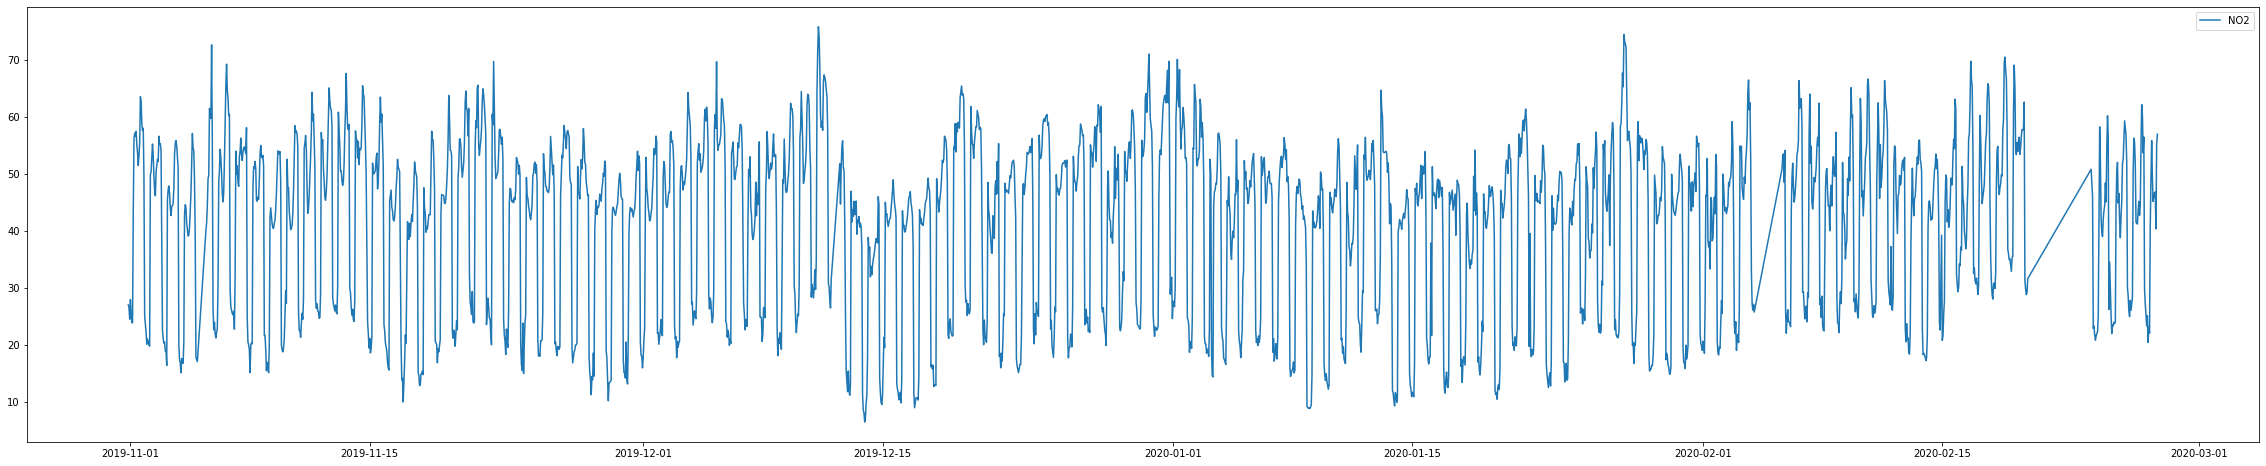

In [0]:
plt.figure(figsize=(40,8))
plt.plot(NO2['Date'],NO2['NO2'],label='NO2')
plt.legend()

2. Box Plot

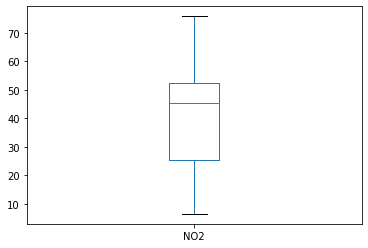

In [0]:
NO2['NO2'].plot(kind='box')

4. Dealing with Outliers

In [0]:
Q1 =  NO2['NO2'].quantile(0.25)
Q3 = NO2['NO2'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
NO2=NO2[(NO2['NO2'] >= lower) & (NO2['NO2'] <= upper)]
print(NO2)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2699  2020-02-27 10:00:00  ...  The current level of air quality is likely to ...
2700  2020-02-27 11:00:00  ...  The current level of air quality is likely to ...
2701  2020-02-27 12:00:00  ...  The current level of air quality is likely to ...
2702  2020-02-27 13:00:00  ...  The current level of air quality is likely to ...
2703  2020-02-27 14:00:00  ...  The current level of air quality is likely to ...

[2704 rows x 25

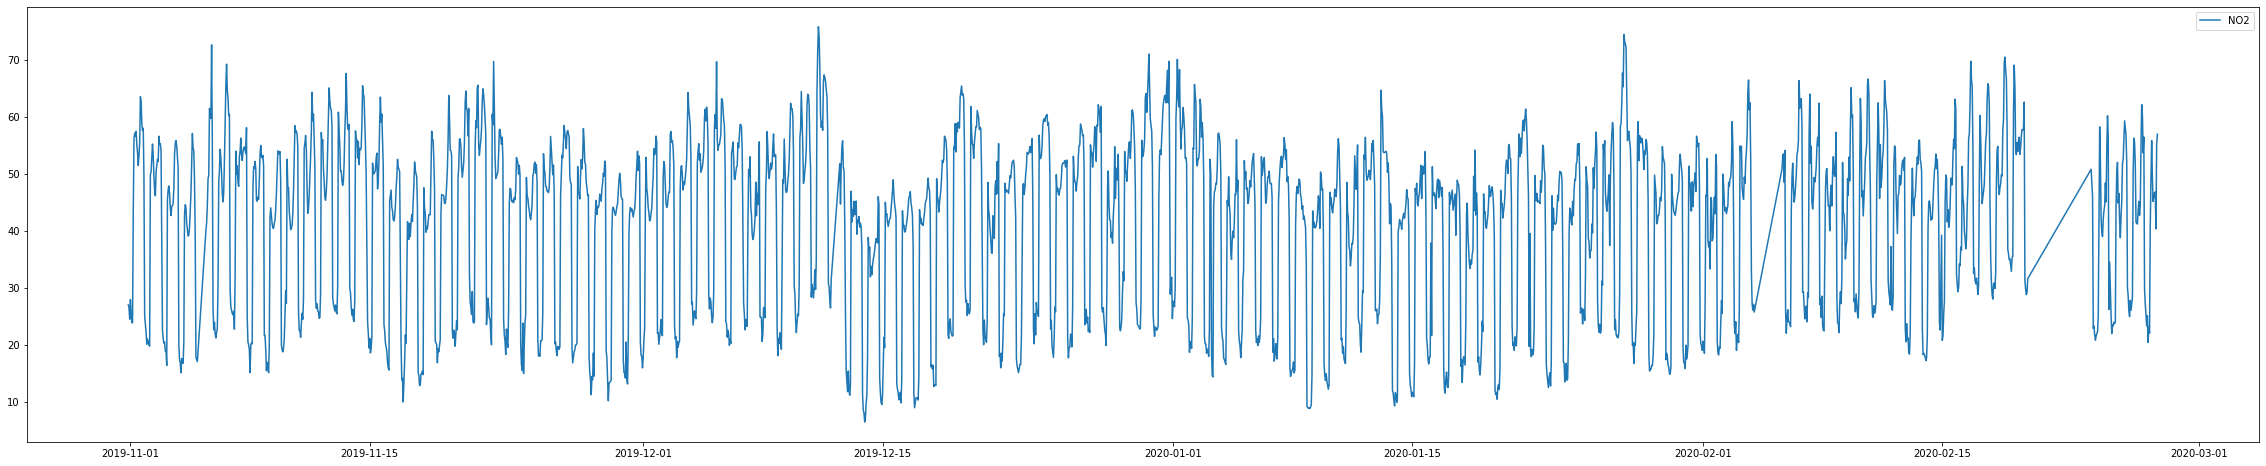

In [0]:
NO2.reset_index(drop=True,inplace=True)
print(NO2)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2699  2020-02-27 10:00:00  ...  The current level of air quality is likely to ...
2700  2020-02-27 11:00:00  ...  The current level of air quality is likely to ...
2701  2020-02-27 12:00:00  ...  The current level of air quality is likely to ...
2702  2020-02-27 13:00:00  ...  The current level of air quality is likely to ...
2703  2020-02-27 14:00:00  ...  The current level of air quality is likely to ...

[2704 rows x 25

5. Train and Test Data Splitting

In [0]:
rows=NO2.shape[0]
train=NO2[0:rows-168]
test=NO2[rows-168:rows]
print(train)
print(test)

                     Date  ...                                           pregnant
0     2019-10-31 21:00:00  ...  The current level of air quality is likely to ...
1     2019-10-31 22:00:00  ...  The current level of air quality is likely to ...
2     2019-10-31 23:00:00  ...  The current level of air quality is likely to ...
3     2019-11-01 00:00:00  ...  The current level of air quality is likely to ...
4     2019-11-01 01:00:00  ...  The current level of air quality is likely to ...
...                   ...  ...                                                ...
2531  2020-02-16 17:00:00  ...  The current level of air quality is likely to ...
2532  2020-02-16 18:00:00  ...  The current level of air quality is likely to ...
2533  2020-02-16 19:00:00  ...  The current level of air quality is likely to ...
2534  2020-02-16 20:00:00  ...  The current level of air quality is likely to ...
2535  2020-02-16 21:00:00  ...  The current level of air quality is likely to ...

[2536 rows x 25

##Model Fitting

In [0]:
print(train.index)

RangeIndex(start=0, stop=2536, step=1)


In [0]:
x=[]
y=[]

In [0]:
for i in range(0,2536):
  x.append([i])

print(x)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [156], [157], [15

In [0]:
for i in train['NO2']:
  y.append(i)

print(y)

[26.96, 26.54, 24.46, 27.91, 25.54, 23.85, 23.83, 43.13, 56.11, 57.1, 56.56, 57.41, 55.12, 53.66, 51.42, 53.14, 55.24, 63.51, 62.67, 62.67, 62.67, 58.85, 57.56, 57.96, 49.58, 25.08, 23.59, 22.12, 20.07, 20.99, 20.48, 19.93, 19.73, 49.75, 50.32, 52.59, 55.19, 53.32, 49.47, 47.17, 46.1, 50.2, 51.49, 52.5, 52.12, 56.56, 55.14, 55.23, 54.09, 54.09, 22.55, 21.12, 20.25, 20.44, 18.86, 18.9, 16.34, 45.5, 47.21, 47.84, 46.4, 44.03, 42.65, 44.26, 44.35, 44.82, 47.41, 53.46, 55.36, 55.8, 54.84, 52.89, 51.04, 20.0, 17.33, 16.84, 15.06, 17.55, 17.06, 16.72, 20.51, 42.88, 44.55, 43.99, 41.27, 40.25, 39.05, 39.22, 40.58, 43.62, 46.54, 52.08, 57.04, 54.55, 53.95, 48.86, 38.91, 17.74, 17.74, 17.74, 17.02, 17.02, 17.02, 17.02, 17.02, 17.02, 17.02, 17.02, 17.02, 17.02, 38.29, 40.02, 41.35, 44.4, 49.07, 49.75, 61.44, 60.72, 59.69, 72.58, 55.45, 26.48, 22.57, 23.92, 21.88, 21.16, 22.15, 22.73, 30.31, 48.33, 50.57, 54.26, 52.72, 50.14, 46.47, 45.04, 46.72, 52.25, 59.31, 65.34, 69.19, 64.63, 63.28, 60.17, 6

In [0]:
for i,j in zip(x,y):
  print(i,j)

[0] 26.96
[1] 26.54
[2] 24.46
[3] 27.91
[4] 25.54
[5] 23.85
[6] 23.83
[7] 43.13
[8] 56.11
[9] 57.1
[10] 56.56
[11] 57.41
[12] 55.12
[13] 53.66
[14] 51.42
[15] 53.14
[16] 55.24
[17] 63.51
[18] 62.67
[19] 62.67
[20] 62.67
[21] 58.85
[22] 57.56
[23] 57.96
[24] 49.58
[25] 25.08
[26] 23.59
[27] 22.12
[28] 20.07
[29] 20.99
[30] 20.48
[31] 19.93
[32] 19.73
[33] 49.75
[34] 50.32
[35] 52.59
[36] 55.19
[37] 53.32
[38] 49.47
[39] 47.17
[40] 46.1
[41] 50.2
[42] 51.49
[43] 52.5
[44] 52.12
[45] 56.56
[46] 55.14
[47] 55.23
[48] 54.09
[49] 54.09
[50] 22.55
[51] 21.12
[52] 20.25
[53] 20.44
[54] 18.86
[55] 18.9
[56] 16.34
[57] 45.5
[58] 47.21
[59] 47.84
[60] 46.4
[61] 44.03
[62] 42.65
[63] 44.26
[64] 44.35
[65] 44.82
[66] 47.41
[67] 53.46
[68] 55.36
[69] 55.8
[70] 54.84
[71] 52.89
[72] 51.04
[73] 20.0
[74] 17.33
[75] 16.84
[76] 15.06
[77] 17.55
[78] 17.06
[79] 16.72
[80] 20.51
[81] 42.88
[82] 44.55
[83] 43.99
[84] 41.27
[85] 40.25
[86] 39.05
[87] 39.22
[88] 40.58
[89] 43.62
[90] 46.54
[91] 52.08
[92] 57

In [0]:
mlp=MLPRegressor()

In [0]:
mlp.fit(x,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [0]:
x_test=[]
for i in range(2536,2704):
  x_test.append([i])

print(x_test)

[[2536], [2537], [2538], [2539], [2540], [2541], [2542], [2543], [2544], [2545], [2546], [2547], [2548], [2549], [2550], [2551], [2552], [2553], [2554], [2555], [2556], [2557], [2558], [2559], [2560], [2561], [2562], [2563], [2564], [2565], [2566], [2567], [2568], [2569], [2570], [2571], [2572], [2573], [2574], [2575], [2576], [2577], [2578], [2579], [2580], [2581], [2582], [2583], [2584], [2585], [2586], [2587], [2588], [2589], [2590], [2591], [2592], [2593], [2594], [2595], [2596], [2597], [2598], [2599], [2600], [2601], [2602], [2603], [2604], [2605], [2606], [2607], [2608], [2609], [2610], [2611], [2612], [2613], [2614], [2615], [2616], [2617], [2618], [2619], [2620], [2621], [2622], [2623], [2624], [2625], [2626], [2627], [2628], [2629], [2630], [2631], [2632], [2633], [2634], [2635], [2636], [2637], [2638], [2639], [2640], [2641], [2642], [2643], [2644], [2645], [2646], [2647], [2648], [2649], [2650], [2651], [2652], [2653], [2654], [2655], [2656], [2657], [2658], [2659], [2660],

In [0]:
yhat=mlp.predict(x_test)
print(yhat)

[38.72915361 38.72920776 38.72926191 38.72931605 38.7293702  38.72942435
 38.72947849 38.72953264 38.72958679 38.72964093 38.72969508 38.72974922
 38.72980337 38.72985752 38.72991166 38.72996581 38.73001996 38.7300741
 38.73012825 38.7301824  38.73023654 38.73029069 38.73034483 38.73039898
 38.73045313 38.73050727 38.73056142 38.73061557 38.73066971 38.73072386
 38.73077801 38.73083215 38.7308863  38.73094044 38.73099459 38.73104874
 38.73110288 38.73115703 38.73121118 38.73126532 38.73131947 38.73137362
 38.73142776 38.73148191 38.73153605 38.7315902  38.73164435 38.73169849
 38.73175264 38.73180679 38.73186093 38.73191508 38.73196923 38.73202337
 38.73207752 38.73213166 38.73218581 38.73223996 38.7322941  38.73234825
 38.7324024  38.73245654 38.73251069 38.73256484 38.73261898 38.73267313
 38.73272727 38.73278142 38.73283557 38.73288971 38.73294386 38.73299801
 38.73305215 38.7331063  38.73316045 38.73321459 38.73326874 38.73332288
 38.73337703 38.73343118 38.73348532 38.73353947 38.

##Model Evaluation

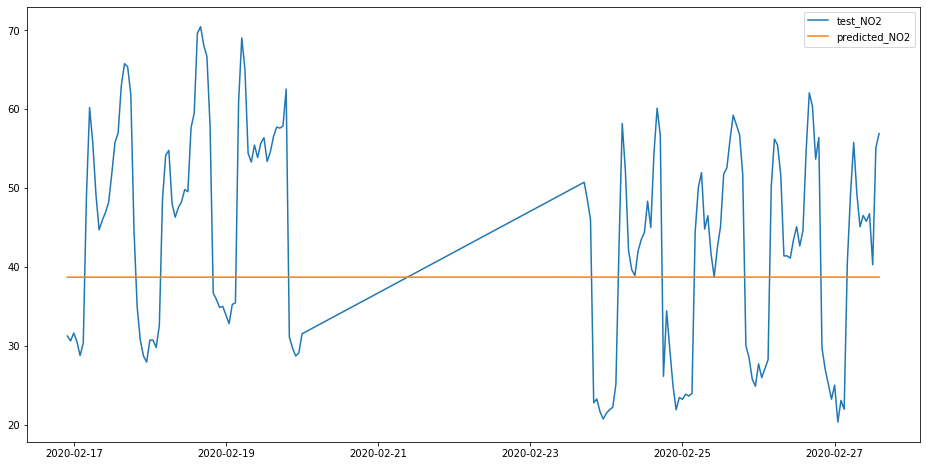

In [0]:
plt.figure(figsize=(16,8))
plt.plot(test['Date'],test['NO2'],label='test_NO2')
plt.plot(test['Date'],yhat,label='predicted_NO2')
plt.legend()

######MAPE Calculation

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
mean_absolute_percentage_error(test['NO2'], yhat)

##For O3

In [0]:
O3=df
print(type(O3))

In [0]:
plt.figure(figsize=(40,8))
plt.plot(O3['Date'],O3['O3'],label='O3')
plt.legend()

In [0]:
O3['O3'].plot(kind='box')

In [0]:
Q1 =  O3['O3'].quantile(0.25)
Q3 = O3['O3'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
O3=O3[(O3['O3'] >= lower) & (O3['O3'] <= upper)]
print(O3)

In [0]:
plt.figure(figsize=(40,8))
plt.plot(O3['Date'],O3['O3'],label='O3')
plt.legend()

In [0]:
O3.reset_index(drop=True,inplace=True)
print(O3)

In [0]:
rows=O3.shape[0]
train=O3[0:rows-168]
test=O3[rows-168:rows]
print(train)
print(test)

In [0]:
fit=ExponentialSmoothing(train['O3'],seasonal="additive",seasonal_periods=24).fit()

In [0]:
yhat=fit.predict(start=rows-168,end=rows-1)

In [0]:
plt.figure(figsize=(16,8))
plt.plot(test['Date'],test['O3'],label='test_O3')
plt.plot(test['Date'],yhat,label='predicted_O3')
plt.legend()

In [0]:
mean_absolute_percentage_error(test['O3'], yhat)

##For SO2

In [0]:
SO2=df
print(type(SO2))

In [0]:
plt.figure(figsize=(40,8))
plt.plot(SO2['Date'],SO2['SO2'],label='SO2')
plt.legend()

In [0]:
SO2['SO2'].plot(kind='box')

In [0]:
Q1 =  SO2['SO2'].quantile(0.25)
Q3 = SO2['SO2'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
SO2=SO2[(SO2['SO2'] >= lower) & (SO2['SO2'] <= upper)]
print(SO2)

In [0]:
plt.figure(figsize=(40,8))
plt.plot(SO2['Date'],SO2['SO2'],label='SO2')
plt.legend()

In [0]:
SO2.reset_index(drop=True,inplace=True)
print(SO2)

In [0]:
rows=SO2.shape[0]
train=SO2[0:rows-168]
test=SO2[rows-168:rows]
print(train)
print(test)

In [0]:
fit=ExponentialSmoothing(train['SO2'],seasonal="additive",seasonal_periods=24).fit()

In [0]:
yhat=fit.predict(start=rows-168,end=rows-1)

In [0]:
plt.figure(figsize=(16,8))
plt.plot(test['Date'],test['SO2'],label='test_SO2')
plt.plot(test['Date'],yhat,label='predicted_SO2')
plt.legend()

In [0]:
mean_absolute_percentage_error(test['SO2'], yhat)